# Problem 3

(a)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
world_values_hdi_train = pd.read_csv('world-values-hdi-train.csv', low_memory=False)

In [3]:
world_values_train = pd.read_csv('world-values-train.csv', low_memory=False)

In [4]:
world_values_train

,Country,Action taken on climate change,Better transport and roads,Support for people who can't work,Access to clean water and sanitation,Better healthcare,A good education,A responsive government we can trust,Phone and internet access,Reliable energy at home,Affordable and nutritious food,Protecting forests rivers and oceans,Protection against crime and violence,Political freedoms,Freedom from discrimination and persecution,Equality between men and women,Better job opportunities
0,Iran (Islamic Republic of),0.049136,0.052920,0.070922,0.050945,0.070616,0.088451,0.074428,0.069531,0.053560,0.056342,0.053588,0.059264,0.056788,0.057483,0.065023,0.071005
1,Eritrea,0.017241,0.040230,0.051724,0.063218,0.074713,0.103448,0.091954,0.017241,0.040230,0.068966,0.051724,0.068966,0.051724,0.103448,0.091954,0.063218
2,Fiji,0.047921,0.047030,0.053663,0.055842,0.098020,0.121485,0.077426,0.033762,0.031881,0.062772,0.050990,0.066436,0.037426,0.046931,0.051089,0.117327
3,Grenada,0.055556,0.022222,0.051852,0.066667,0.107407,0.125926,0.070370,0.022222,0.029630,0.088889,0.048148,0.074074,0.022222,0.040741,0.055556,0.118519
4,Sierra Leone,0.018636,0.065971,0.046217,0.083861,0.122624,0.133433,0.078271,0.032799,0.039881,0.057398,0.020127,0.059262,0.035408,0.046590,0.046962,0.112561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Tanzania (United Republic of),0.025883,0.033771,0.040200,0.067912,0.101200,0.128832,0.064950,0.059413,0.031139,0.076674,0.041382,0.076709,0.035160,0.051775,0.057044,0.107954
144,Serbia,0.031838,0.042624,0.058915,0.043591,0.109276,0.114930,0.103325,0.025664,0.030053,0.057874,0.058320,0.092762,0.031689,0.048575,0.035483,0.115078
145,Haiti,0.024863,0.059963,0.074936,0.063490,0.122311,0.140777,0.068366,0.033854,0.029255,0.083201,0.041255,0.061104,0.023480,0.034166,0.031641,0.107338
146,Yemen,0.017548,0.039540,0.062984,0.066139,0.076111,0.102729,0.100805,0.058876,0.039316,0.087255,0.022170,0.073097,0.041391,0.050690,0.056958,0.104392


In [5]:
world_values_test = pd.read_csv('world-values-test.csv')

In [6]:
y_train = np.where(world_values_hdi_train['2015']>=0.7, 1, -1)

In [7]:
X_train = world_values_train.iloc[:,1:]

In [8]:
X_test = world_values_test.iloc[:,1:]

In [9]:
X_test

,Action taken on climate change,Better transport and roads,Support for people who can't work,Access to clean water and sanitation,Better healthcare,A good education,A responsive government we can trust,Phone and internet access,Reliable energy at home,Affordable and nutritious food,Protecting forests rivers and oceans,Protection against crime and violence,Political freedoms,Freedom from discrimination and persecution,Equality between men and women,Better job opportunities
0,0.017600,0.061994,0.056404,0.077203,0.105198,0.130451,0.081784,0.028845,0.032363,0.076162,0.019078,0.081625,0.052110,0.047997,0.035105,0.096079
1,0.033651,0.042540,0.030476,0.059683,0.113651,0.131429,0.096508,0.054603,0.034921,0.033651,0.064127,0.055238,0.054603,0.067302,0.046349,0.081270
2,0.028451,0.030032,0.060327,0.074816,0.098261,0.125922,0.085616,0.032929,0.028451,0.066649,0.033193,0.093519,0.033983,0.057692,0.064805,0.085353
3,0.018987,0.039845,0.062807,0.050741,0.123416,0.118318,0.086658,0.019969,0.021980,0.048076,0.039471,0.094701,0.030959,0.053875,0.050040,0.140158
4,0.062230,0.029466,0.018751,0.082011,0.086132,0.130023,0.088605,0.020400,0.024521,0.095199,0.090253,0.084072,0.024109,0.049660,0.056254,0.058314
5,0.044952,0.046335,0.049793,0.085062,0.098202,0.121715,0.071923,0.052559,0.044952,0.071923,0.051867,0.071231,0.033195,0.041494,0.047026,0.067773
6,0.038900,0.037644,0.050501,0.064944,0.103381,0.113329,0.077404,0.030968,0.025217,0.057838,0.032455,0.080213,0.060713,0.065208,0.062399,0.098886
7,0.030542,0.050216,0.047008,0.059229,0.077751,0.127881,0.074860,0.035953,0.029908,0.072572,0.032003,0.087862,0.065769,0.056075,0.046335,0.106036
8,0.063857,0.031124,0.029976,0.080395,0.077524,0.113816,0.087516,0.023085,0.022396,0.079821,0.094177,0.087401,0.024348,0.050419,0.060181,0.073963
9,0.045113,0.030075,0.053210,0.062464,0.085599,0.111047,0.095431,0.027183,0.022556,0.068826,0.050896,0.085020,0.045691,0.068826,0.060729,0.087334


(b)

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score

In [31]:
param_range = [*range(1,100)]
train_scores, test_scores = validation_curve(estimator=SVC(),\
                                             X=X_train,y=y_train,cv=3,\
                                             param_name="C",scoring="accuracy",
                                             param_range=param_range)

In [35]:
def plot_cross_validation_curve(param_range, train_scores, test_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    #Plot CV error as a function of alpha
    plt.title("Validation Curve")
    plt.xlabel("Parameter")
    plt.ylabel("Score")
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    parameter_best = param_range[np.argmax(test_scores_mean)]
    print('The best parameter is:', 
          parameter_best)
    best_train_scores = train_scores[param_range.index(parameter_best)]
    best_test_scores = test_scores[param_range.index(parameter_best)]
    print('The bests train scores of this parameter are:', best_train_scores)
    print('The bests test scores of this parameter are:', best_test_scores)

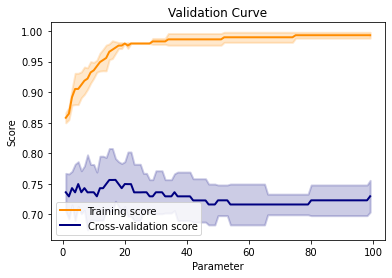

The best parameter is: 17
The bests train scores of this parameter are: [0.95918367 0.97979798 0.97979798]
The bests test scores of this parameter are: [0.8        0.71428571 0.75510204]


In [36]:
plot_cross_validation_curve(param_range, train_scores, test_scores)

In [38]:
svm = SVC(C=17)
svm.fit(X_train, y_train)
training_accuracy = accuracy_score(y_train, svm.predict(X_train))
print(training_accuracy)

0.9527027027027027


(c)

In [39]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
training_accuracy = accuracy_score(y_train, svm_rbf.predict(X_train))
print(training_accuracy)

0.8445945945945946


(d)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
KNN = KNeighborsClassifier

In [42]:
param_range = [*range(1,50)]
train_scores, test_scores = validation_curve(estimator=KNN(weights='distance'),\
                                             X=X_train,y=y_train,cv=3,\
                                             param_name="n_neighbors",scoring="accuracy",
                                             param_range=param_range)

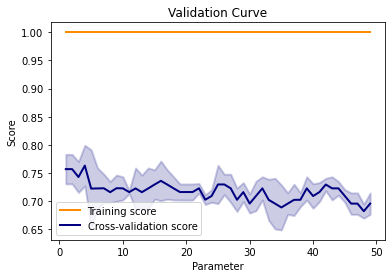

The best parameter is: 4
The bests train scores of this parameter are: [1. 1. 1.]
The bests test scores of this parameter are: [0.8        0.71428571 0.7755102 ]


In [43]:
plot_cross_validation_curve(param_range, train_scores, test_scores)

In [44]:
KNN_distance = KNN(weights='distance', n_neighbors=4)
KNN_distance.fit(X_train, y_train)
training_accuracy = accuracy_score(y_train, KNN_distance.predict(X_train))
print(training_accuracy)

1.0


In [45]:
KNN_distance = KNN(weights='distance', n_neighbors=4)
KNN_distance.fit(X_train, y_train)
y_pred = KNN_distance.predict(X_test)
print(y_pred)

[-1 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1 -1  1 -1  1  1  1  1  1 -1  1]


In [46]:
world_values_test['y_pred'] = y_pred

In [47]:
world_values_test.iloc[:,[0,-1]]

,Country,y_pred
0,Egypt,-1
1,Myanmar,-1
2,Namibia,-1
3,Bosnia and Herzegovina,-1
4,Panama,1
5,Guinea,-1
6,Bahrain,1
7,Congo (Democratic Republic of the),1
8,Costa Rica,1
9,Cyprus,1


(f)

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
y_train_reg = world_values_hdi_train['2015']

In [23]:
y_train_reg

0      0.774
1      0.420
2      0.736
3      0.754
4      0.420
       ...  
143    0.531
144    0.776
145    0.493
146    0.482
147    0.498
Name: 2015, Length: 148, dtype: float64

In [24]:
knn_reg = KNeighborsRegressor

In [48]:
param_range = [*range(1,50)]
train_scores, test_scores = validation_curve(estimator=knn_reg(),\
                                             X=X_train,y=y_train_reg,cv=3,\
                                             param_name="n_neighbors",\
                                             scoring="neg_root_mean_squared_error",\
                                             param_range=param_range)

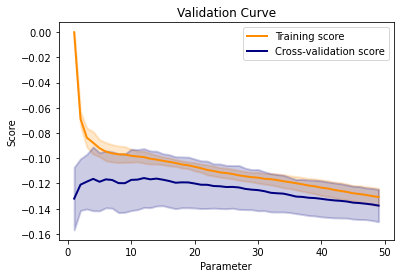

The best parameter is: 12
The bests train scores of this parameter are: [-0.09329119 -0.10492442 -0.09900494]
The bests test scores of this parameter are: [-0.14830989 -0.10370095 -0.09504221]


In [49]:
plot_cross_validation_curve(param_range, train_scores, test_scores)

In [27]:
#The best value of K for the KNN classification and KNN regression is the same as 12 for both.

In [130]:
param_range = [*range(1,50)]
train_scores, test_scores = validation_curve(estimator=knn_reg(weights='distance'),\
                                             X=X_train,y=y_train_reg,cv=3,\
                                             param_name="n_neighbors",\
                                             scoring="neg_root_mean_squared_error",\
                                             param_range=param_range)

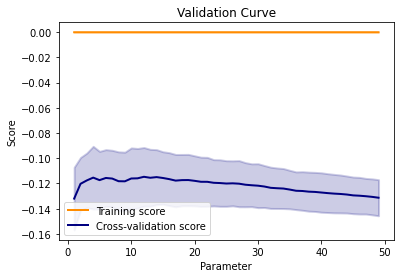

The best parameter is: 12
The bests train scores of this parameter are: [-0. -0. -0.]
The bests test scores of this parameter are: [-0.14716108 -0.1026295  -0.09426823]


In [131]:
plot_cross_validation_curve(param_range, train_scores, test_scores)

In [83]:
knn_reg_distance = knn_reg(weights='distance', n_neighbors=12)
knn_reg_distance.fit(X_train, y_train_reg)
y_pred_knn_reg_distance = knn_reg_distance.predict(X_test)

In [84]:
knn_reg_uniform = knn_reg(weights='uniform', n_neighbors=12)
knn_reg_uniform.fit(X_train, y_train_reg)
y_pred_knn_reg_uniform = knn_reg_uniform.predict(X_test)

In [50]:
from sklearn.linear_model import Lasso, LassoCV

In [121]:
lassoRegr = Lasso(max_iter = 10000, normalize=True)
alphas = [*range(1,10)]
alphas = [x/2000 for x in alphas]
train_scores, test_scores = validation_curve(
    lassoRegr, X_train, y_train_reg, cv=3, param_name="alpha", param_range=alphas,
    scoring="neg_root_mean_squared_error")

In [127]:
def plot_cross_validation_curve(param_range, train_scores, test_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    #Plot CV error as a function of alpha
    plt.title("Validation Curve")
    plt.xlabel("Parameter")
    plt.ylabel("Score")
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    parameter_best = param_range[np.argmax(test_scores_mean)]
    print('The best parameter is:', 
          parameter_best)
    best_train_scores = train_scores[param_range.index(parameter_best)]
    best_test_scores = test_scores[param_range.index(parameter_best)]
    print('The bests train scores of this parameter are:', best_train_scores)
    print('The bests test scores of this parameter are:', best_test_scores)

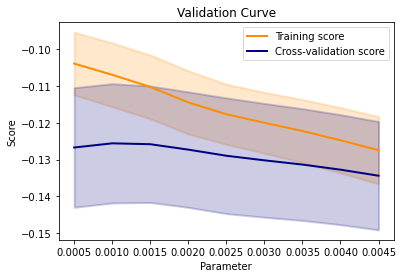

The best parameter is: 0.001
The bests train scores of this parameter are: [-0.09521382 -0.10992799 -0.11581348]
The bests test scores of this parameter are: [-0.14637315 -0.12350675 -0.10686484]


In [128]:
plot_cross_validation_curve(alphas, train_scores, test_scores)

KNN_reg (uniform)
The best parameter is: 12
The bests train scores of this parameter are: [-0.09329119 -0.10492442 -0.09900494]
The bests test scores of this parameter are: [-0.14830989 -0.10370095 -0.09504221]

KNN_reg (distance）
The best parameter is: 12
The bests train scores of this parameter are: [-0. -0. -0.]
The bests test scores of this parameter are: [-0.14716108 -0.1026295  -0.09426823]

LASSO:
The best parameter is: 0.001
The bests train scores of this parameter are: [-0.09521382 -0.10992799 -0.11581348]
The bests test scores of this parameter are: [-0.14637315 -0.12350675 -0.10686484]

The results are quite similar, the KNN regression using distance has the lowest training errors as well as test errors.

In [132]:
best_lassoRegr = Lasso(max_iter = 10000, normalize=True, alpha = 0.001)
best_lassoRegr.fit(X_train, y_train_reg)
y_pred_lasso = best_lassoRegr.predict(X_test)

In [133]:
world_values_test['y_pred_knn_reg_uniform'] = y_pred_knn_reg_uniform

world_values_test['y_pred_knn_reg_distance'] = y_pred_knn_reg_distance

In [134]:
world_values_test['y_pred_lasso'] = y_pred_lasso
world_values_test.iloc[:,[0,-4,-3,-2,-1]]

,Country,y_pred,y_pred_lasso,y_pred_knn_reg_uniform,y_pred_knn_reg_distance
0,Egypt,-1,0.529275,0.529417,0.524867
1,Myanmar,-1,0.708970,0.686750,0.686083
2,Namibia,-1,0.612103,0.647083,0.655769
3,Bosnia and Herzegovina,-1,0.634779,0.669083,0.670909
4,Panama,1,0.803414,0.823000,0.819585
5,Guinea,-1,0.617141,0.611000,0.615157
6,Bahrain,1,0.631759,0.616500,0.621549
7,Congo (Democratic Republic of the),1,0.623348,0.627667,0.628446
8,Costa Rica,1,0.828925,0.786167,0.782805
9,Cyprus,1,0.721080,0.795667,0.793900


In [135]:
coefficients_lasso = pd.DataFrame(best_lassoRegr.coef_, index=X_train.columns)
coefficients_lasso.rename(columns={coefficients_lasso.columns[0]: "Coefficient" }, \
                                   inplace = True)

In [136]:
coefficients_lasso.sort_values(by='Coefficient',ascending=False)

,Coefficient
Protecting forests rivers and oceans,3.158729
Freedom from discrimination and persecution,0.932121
A responsive government we can trust,0.393864
Action taken on climate change,0.329250
Political freedoms,0.254221
Equality between men and women,0.067381
Support for people who can't work,-0.000000
Affordable and nutritious food,0.000000
Protection against crime and violence,0.000000
Better job opportunities,-0.000000


Many features influence the HDI, specifically, 'Protecting forests rivers and oceans' and 'Freedom from discrimination and persecution' tend to influence the most, followed by 'A responsive government we can trust', 'Action taken on climate change', and 'Political freedoms', 'Support for people who can't work', 'Protection against crime and violence', and 'Better job opportunities' do not seem to have much influence 'Reliable energy at home', 'Access to clean water and sanitation', 'Better healthcare', and 'Better transport and roads' seem to have negative influence on HDI.